In [667]:
#데이터 준비하기 
import pandas as pd

train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")

In [668]:
print(train_data.shape)
train_data.drop(index=762,axis =0,inplace= True)
train_data.drop(index=465,axis =0,inplace= True)
train_data.drop(index=47,axis =0,inplace= True)
train_data.drop(index=382,axis =0,inplace= True)
train_data.drop(index=435,axis =0,inplace= True)
train_data.drop(index=1078,axis =0,inplace= True)

(1253, 10)


In [669]:
#water = 전체무게 -(껍질무게+껍질을 제외한 무게) 보다 ratio=껍질을 제외한 무게/전체 무게 
water_train = train_data['Whole Weight'] -train_data['Shucked Weight']
water_ques = ques_data['Whole Weight'] -ques_data['Shucked Weight']

In [670]:
#train_data['Water'] = water_train
#ques_data['Water'] = water_ques

In [671]:
Ratio_train =  train_data['Shucked Weight']/train_data['Whole Weight'] 
Ratio_ques =  ques_data['Shucked Weight']/ques_data['Whole Weight'] 
train_data['Ratio'] = Ratio_train
ques_data['Ratio'] = Ratio_ques
print(train_data.head())
ques_data.head()

   id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target     Ratio  
0         0.2910        0.3100      15  0.352334  
1         0.0800        0.1045       8  0.462963  
2         0.2540        0.4100      18  0.402962  
3         0.3265        0.3370      13  0.431326  
4         0.0310        0.0400       6  0.377953  


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Ratio
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.402765
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.297735
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.427835
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.412886
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.464960


In [672]:
ques_input = ques_data.drop(['id'], axis=1)
train_max_input = train_data.drop(['id', 'Target'], axis=1)
train_max_target = train_data['Target']

In [673]:
print(type(train_max_input))
print(type(train_max_target))
print(type(ques_input))
print(train_max_input.to_numpy())
print(train_max_input.columns)
print(train_max_input['Gender']=='M')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[['M' 0.605 0.47 ... 0.291 0.31 0.3523339317773788]
 ['I' 0.43 0.315 ... 0.08 0.1045 0.4629629629629629]
 ['I' 0.58 0.49 ... 0.254 0.41 0.4029624003038359]
 ...
 ['F' 0.525 0.41 ... 0.163 0.18 0.5371207230471272]
 ['F' 0.445 0.335 ... 0.1095 0.1195 0.46498277841561425]
 ['F' 0.75 0.55 ... 0.366 0.44 0.45293315143246926]]
Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Ratio'],
      dtype='object')
0        True
1       False
2       False
3        True
4       False
        ...  
1248    False
1249    False
1250    False
1251    False
1252    False
Name: Gender, Length: 1247, dtype: bool


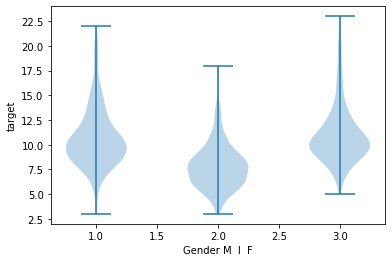

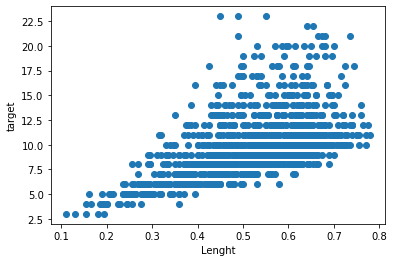

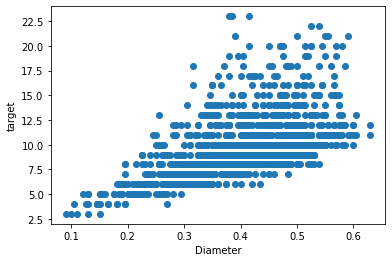

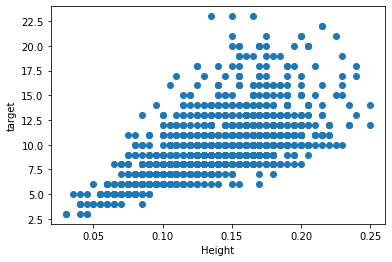

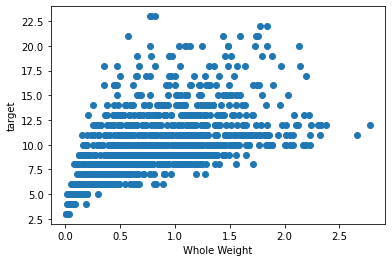

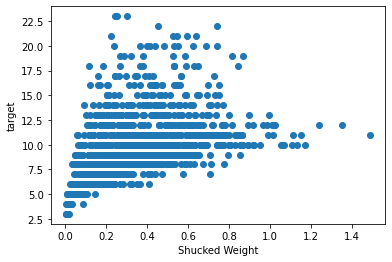

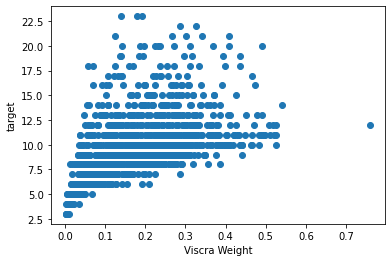

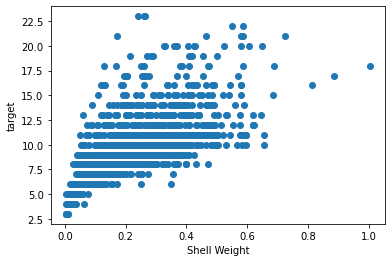

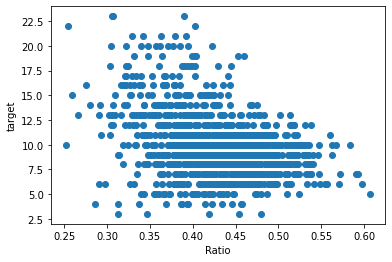

In [674]:
import matplotlib.pyplot as plt
i=1
for column in train_max_input.columns:
    if column == 'Gender':
        plt.violinplot([train_max_target[train_max_input[column]=='M'],train_max_target[train_max_input[column]=='I'],train_max_target[train_max_input[column]=='F']])
        plt.xlabel("Gender M  I  F")
        plt.ylabel('target')
        plt.show()
    else:
        plt.scatter(train_max_input[column],train_max_target)
        plt.xlabel(column)
        plt.ylabel('target')
        plt.show()

823
349
75


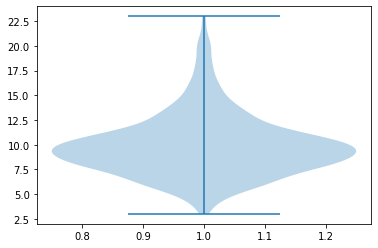

In [675]:
import numpy as np
print(np.sum(train_max_target<=10))
print(np.sum(train_max_target<=15) -np.sum(train_max_target<=10) )
print(np.sum(15<train_max_target))
plt.violinplot(train_max_target)
plt.show()


In [676]:

print(train_max_input.shape)
#train_max_input.drop(index = [train_max_target>25], axis = 0)
train_max_input[train_max_target>25]
print(train_max_input.shape)
print(train_max_target.shape)

(1247, 9)
(1247, 9)
(1247,)


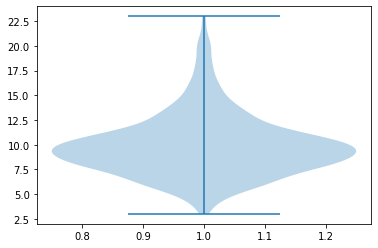

In [677]:
plt.violinplot(train_max_target)
plt.show()

In [678]:
print(np.sum(train_max_target<=5))
print(np.sum(train_max_target<=13) -np.sum(train_max_target<=5) )
print(np.sum(13<train_max_target))

55
1049
143


In [679]:
# 그전에 훈련세트 나누기
#import하기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [680]:
train_max_input = pd.get_dummies(train_max_input)
ques_input =pd.get_dummies(ques_input)

In [681]:
#훈련세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(train_max_input,train_max_target, test_size=0.2, random_state=30)
print(train_input.shape)
print(test_input.shape)
print(train_max_input.shape)

(997, 11)
(250, 11)
(1247, 11)


In [682]:
#훈련세트랑 검증세트도
sub_input, val_input,sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2,random_state=30)
print(train_input.shape)
print(sub_input.shape)
print(val_input.shape)

(997, 11)
(797, 11)
(200, 11)


5보다 작은거랑 13보다 큰거 오버 샘플링 하겠음

In [683]:
T_range = []
for i in sub_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=15:
        T_range.append(3)
    else:
        T_range.append(4)

[31, 347, 372, 47]


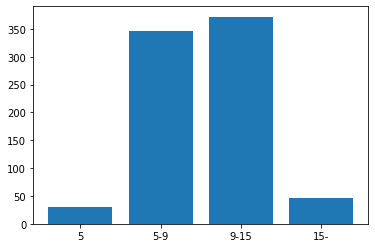

In [684]:
T_range =np.array(T_range)
T_range_x = ['5','5-9','9-15','15-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [685]:
print(val_input.shape)
sub_T1 =sub_input[T_range==1]
sub_T4 =sub_input[T_range==4]
sub_target_T1 =sub_target[T_range==1]
sub_target_T4 =sub_target[T_range==4]
for i in range(0,6):
    sub_input = pd.concat([sub_input,sub_T1],axis=0)
    sub_target =pd.concat([sub_target,sub_target_T1])
for i in range(0,0):
    sub_input =pd.concat([sub_input,sub_T4],axis=0)
    sub_target =pd.concat([sub_target,sub_target_T4])
print(sub_input.shape)
print(sub_input)
    

(200, 11)
(983, 11)
      Lenght  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
52     0.655     0.540   0.175        1.5585          0.7285         0.4020   
1211   0.560     0.445   0.165        0.8320          0.3455         0.1790   
1020   0.620     0.480   0.165        1.0125          0.5325         0.4365   
67     0.510     0.400   0.125        0.5575          0.2615         0.1195   
1053   0.495     0.400   0.155        0.8085          0.2345         0.1155   
...      ...       ...     ...           ...             ...            ...   
323    0.345     0.255   0.085        0.2005          0.1050         0.0370   
1197   0.300     0.225   0.075        0.1345          0.0570         0.0280   
73     0.245     0.180   0.065        0.0710          0.0300         0.0130   
1112   0.205     0.150   0.055        0.0420          0.0255         0.0150   
179    0.215     0.155   0.060        0.0525          0.0210         0.0165   

      Shell Weight     Ratio  G

[217, 347, 372, 47]


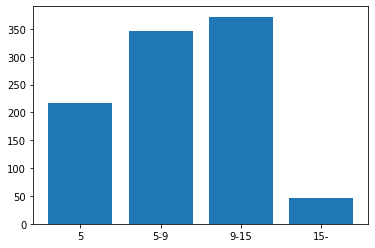

In [686]:
T_range = []
for i in sub_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=15:
        T_range.append(3)
    else:
        T_range.append(4)

T_range =np.array(T_range)
T_range_x = ['5','5-9','9-15','15-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [687]:
print(train_max_input.shape, '=')
print(train_input.shape,'+')
print(test_input.shape,'=')
print(sub_input.shape,'많음')
print(val_input.shape)

(1247, 11) =
(997, 11) +
(250, 11) =
(983, 11) 많음
(200, 11)


In [688]:

ques_input =ques_input.to_numpy()
sub_target=sub_target.to_numpy()
sub_input =sub_input.to_numpy()
val_target=val_target.to_numpy()
val_input =val_input.to_numpy()

In [689]:
#특성공학으로 특성 늘리기
poly = PolynomialFeatures(degree=2,include_bias= False)
poly.fit(sub_input)
train_poly=poly.transform(train_input)
test_poly = poly.transform(test_input)
sub_poly=poly.transform(sub_input)
val_poly = poly.transform(val_input)

ques_poly = poly.transform(ques_input)

C:\Users\dlehd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
C:\Users\dlehd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [690]:
#규제 전 전처리 과정
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(sub_poly)
train_scaled = ss.transform(train_poly)
sub_scaled = ss.transform(sub_poly)
val_scaled = ss.transform(val_poly)

ques_scaled = ss.transform(ques_poly)
test_scaled = ss.transform(test_poly)

In [691]:
print(train_max_scaled.shape, '=')
print(train_scaled.shape,'+')
print(test_scaled.shape,'=')
print(sub_scaled.shape)
print(val_scaled.shape)

(1577, 77) =
(997, 77) +
(250, 77) =
(983, 77)
(200, 77)


In [692]:
#릿지 규제
ridge = Ridge()
ridge.fit(sub_scaled, sub_target)
print(ridge.score(sub_scaled,sub_target))
print(ridge.score(val_scaled,val_target))

0.7132588259848998
0.5492876157672912


In [693]:
sub_scores =[]
val_scores = []

In [694]:
#최적의 alpha값 찾기
alpha_list = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for alpha in alpha_list:
    ridge= Ridge(alpha=alpha)
    ridge.fit(sub_scaled, sub_target)
    sub_scores.append(ridge.score(sub_scaled,sub_target))
    val_scores.append(ridge.score(val_scaled,val_target))
    
print(sub_scores)
print(val_scores)
print('-----------------------------')
print(np.max(val_scores))
print(alpha_list[np.argmax(val_scores)])

[0.7260659270018378, 0.7258804273228607, 0.7249141242238657, 0.7214752000098981, 0.7132588259848998, 0.7013266887205444, 0.6681977308373221, 0.6249935013963765, 0.4845093769858386]
[0.5133247169546207, 0.5123482565018873, 0.5107857988006326, 0.5243204461919788, 0.5492876157672912, 0.5598032167797737, 0.5485730566550819, 0.5166284314390202, 0.3733327641970837]
-----------------------------
0.5598032167797737
10


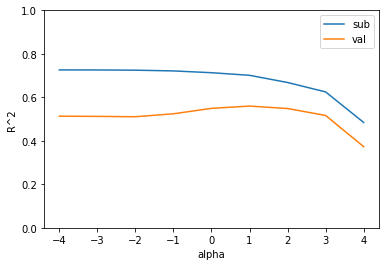

In [695]:
plt.plot(np.log10(alpha_list),sub_scores)
plt.plot(np.log10(alpha_list),val_scores)
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['sub','val'])
plt.show()

In [696]:
#최종 확인
ridge =Ridge(alpha=10)
ridge.fit(sub_scaled,sub_target)
print(ridge.score(sub_scaled,sub_target))
print(ridge.score(test_scaled,test_target))

0.7013266887205444
0.6110122340653301


그럼 이제 전체 트레인을 오버샘플링해서 넣어줘야 함.

In [697]:
print(train_scaled.shape)
print(sub_scaled.shape)
print(val_scaled.shape)
print(test_scaled.shape)
print(train_max_input.shape)
print(train_max_target.shape)

(997, 77)
(983, 77)
(200, 77)
(250, 77)
(1247, 11)
(1247,)


In [698]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=15:
        T_range.append(3)
    else:
        T_range.append(4)

[55, 566, 551, 75]


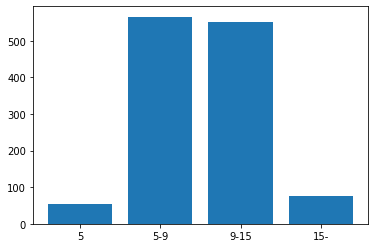

In [699]:
T_range =np.array(T_range)
T_range_x = ['5','5-9','9-15','15-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [700]:
print(val_input.shape)
train_max_T1 =train_max_input[T_range==1]
train_max_T4 =train_max_input[T_range==4]
train_max_target_T1 =train_max_target[T_range==1]
train_max_target_T4 =train_max_target[T_range==4]
for i in range(0,6):
    train_max_input = pd.concat([train_max_input,train_max_T1],axis=0)
    train_max_target =pd.concat([train_max_target,train_max_target_T1])
for i in range(0,0):
    train_max_input =pd.concat([train_max_input,train_max_T4],axis=0)
    train_max_target =pd.concat([train_max_target,train_max_target_T4])
print(train_max_input.shape)
print(train_max_input)

(200, 11)
(1577, 11)
      Lenght  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0      0.605     0.470   0.115        1.1140          0.3925         0.2910   
1      0.430     0.315   0.095        0.3780          0.1750         0.0800   
2      0.580     0.490   0.195        1.3165          0.5305         0.2540   
3      0.535     0.405   0.175        1.2705          0.5480         0.3265   
4      0.310     0.235   0.090        0.1270          0.0480         0.0310   
...      ...       ...     ...           ...             ...            ...   
1112   0.205     0.150   0.055        0.0420          0.0255         0.0150   
1126   0.395     0.295   0.090        0.3025          0.1430         0.0665   
1197   0.300     0.225   0.075        0.1345          0.0570         0.0280   
1203   0.235     0.160   0.040        0.0480          0.0185         0.0180   
1248   0.190     0.145   0.040        0.0380          0.0165         0.0065   

      Shell Weight     Ratio  

[385, 566, 551, 75]


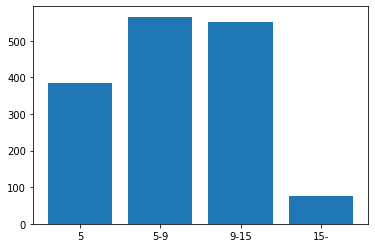

In [701]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=15:
        T_range.append(3)
    else:
        T_range.append(4)

T_range =np.array(T_range)
T_range_x = ['5','5-9','9-15','15-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [702]:
train_max_input=train_max_input.to_numpy()
train_max_target=train_max_target.to_numpy()

In [703]:
train_max_poly = poly.transform(train_max_input)
train_max_scaled = ss.transform(train_max_poly)

In [704]:
#최종 확인
ridge =Ridge(alpha=10)
ridge.fit(train_max_scaled,train_max_target)
ans = ridge.predict(ques_scaled)
ans

array([10.47019561, 14.75944393,  5.17383311, ...,  9.67461227,
        8.85807122, 12.18020942])

In [705]:
submission = pd.read_csv("E:\데이콘\전복나이 예측\데이터\sample_submission.csv")
submission['Target'] = ans
submission.to_csv("Submit_7(오버샘플링피처추가릿지).csv",index=False)